## Conditional Probability

P(A∣B)= P(A∩B)/P(B)
​
 P(A∣B)!=P(B∣A)


P(A∣B)= P(A∩B)/P(B)
P(B∣A)= P(A∩B)/P(A)

## Applying Bayes Rule to Spam Detection

for individual word

P(Spam|w) = P(w|Spam) P(Spam) / P(w)
P(w) "from dataset." "How frequent is this word?"

P(Spam) = # of spam messages / # of all messages

P(w|Spam) = # of times this word appears in spam / # of spam messages

P(w) = # of times this word appears / # of total messages.

for all word
Product notation:
P(spam ∣ words)=∏ i=1∣words∣P(spam ∣w i )

## Spam Detection using Naive Bayes

In [2]:
import numpy as np

# Collecting the Dataset

In [3]:
spam = [
    "To use your credit, click the new WAP link in the next years txt message or click here",
    "Thanks for your subscription to New Ringtone UK your new mobile will be charged £5/month Ple",
    "As a valued customer, I am pleased to advise you that following recent delivery waiting revi:",
    "Please call our new customer service representative on",
    "We are trying to contact you. Last weekends customer draw shows that you won a £1000 prize O"
]

In [4]:

# leave one sentence from spam for testing our model later
spam_test = ["Customer service announcement. You have a New Years delivery waiting for you. click"]


In [5]:
non = [
    "I don't think he goes to usf, he lives around here though",
    "New car and house for my parents. i have only new job in hand",
    "Great escape. I fancy the bridge but needs her lager. See you tomorrow",
    "Tired. I haven't slept well the past few nights.",
    "Too late. I said i have the website. I didn't i have or dont have the slippers",
    "I might come by tonight then if my class lets out early",
    "Jos ask if u wana meet up?",
    "That would be great. We'll be at the Guild. We can try meeting with the customer on Bristol"
]

In [6]:
# another sentence from non for testing our model
non_test_2 = ["That would be great. We'll be at the Guild. We can try meeting with the customer"]

## Basic Pre Processing

In [ ]:
# from gensim.parsing.preprocessing import remove_stopwords
# from gensim.parsing.porter import PorterStemmer
# from gensim.utils import tokenize

In [ ]:
# test_sentence = non[4]
# # test_sentence = non[5]
# # test_sentence = spam[1]

# print(test_sentence)

# removed_stops = remove_stopwords(test_sentence)
# print(removed_stops)

# p = PorterStemmer()
# stemmed = p.stem(removed_stops)
# print(stemmed)

# tokens = tokenize(stemmed)
# print(list(tokens))

## Create a Dictionary of words

In [ ]:
# def tokenize_sentence(sentence):
#     p = PorterStemmer()
#     removed_stops = remove_stopwords(sentence)
#     stemmed = p.stem(removed_stops)
#     tokens = tokenize(stemmed)
#     return list(tokens)

# dictionary = set() # will have unique values only
# spams_tokenized = []
# nons_tokenized = []

# for sentence in spam:
#     sentence_tokens = tokenize_sentence(sentence)
#     spams_tokenized.append(sentence_tokens)
#     dictionary = dictionary.union(sentence_tokens) # add sentence words

# for sentence in non:
#     sentence_tokens = tokenize_sentence(sentence)
#     nons_tokenized.append(sentence_tokens)
#     dictionary = dictionary.union(sentence_tokens) # add sentence words

# print("Tokenized spam: ", spams_tokenized)
# print("Tokenized non: ", nons_tokenized)
# print("Dictionary: ", dictionary)

## Basic Stats

In [ ]:
# total_word_count = len(dictionary)
# total_spam_messages = len(spams_tokenized)
# total_all_messages = len(spams_tokenized) + len(nons_tokenized)

# print("Total Number of words:", total_word_count)

In [ ]:
# P(spam) ... does not depend on an individual word so let's calculate that separately
# p_spam = total_spam_messages / total_all_messages
# print("P(spam) = ", p_spam)

In [ ]:
# Helper function to count occurances
# def count_word_in_messages(word, messages):
#     total_count = 0
#     for msg in messages:
#         if word in msg: # notice this ensured uniqueness automatically
#             total_count += 1
#     return total_count

## The Actual Probability Computation

In [ ]:
# for test_sentence in spam_test:
#     test_sentence = tokenize_sentence(test_sentence)
#     print(test_sentence)

#     # let's run this for each word separately
#     for word in test_sentence:
#         print("-------------")
#         print("Running for word:", word)

        # Find P( w | spam)
#         spam_count = count_word_in_messages(word, spams_tokenized)
#         p_w_spam = spam_count / total_spam_messages
#         print("P(w | spam) = ", p_w_spam)

#         # Find P( w )
#         w_count = count_word_in_messages(word, spams_tokenized)
#         w_count += count_word_in_messages(word, nons_tokenized) # This line seems incorrect. It should be total_all_messages instead of nons_tokenized for the second argument to count_word_in_messages. Assuming it means counting the word in ALL messages.
#         p_w = w_count / total_all_messages
#         print("P(w) = ", p_w)
#         # Find P( spam | w )
# p_spam_w = (p_w_spam * p_spam) / p_w
# print("P( spam )      = ", p_spam)
# print("P( spam | w ) = ", p_spam_w)
# print("**")
# final_prob *= p_spam_w

# print("P( spam | all_words ) = ", final_prob)

## Events and Variables

Assign outcomes of experiments to variables:
But why?: This question prompts the user to consider the utility of using variables.

Example: 6-side dice rolled:
N ∈ N Constraint: 1≤N≤6 sets the constraint or the range of possible values for N for a standard 6-sided die. This means N can only be 1, 2, 3, 4, 5, or 6.

Scenario: "Measure ages of 100 people."

Frequency Table:
A frequency table summarizes the distribution of a dataset by showing the number of times each value or range of values appears. The example table shows "Weight" (likely meaning age range or a different category, as the title is "Measure ages of 100 people" but the column is "Weight") and "Frequency".
Weight

Frequency

10  5

20  20

30  40

40  30

50  5



Total Probability 

P(B=1)=∑i P(B=1,C=i)

This formula means that the probability of event B having an outcome of 1 can be found by summing the joint probabilities of B=1 with all possible outcomes i of another event C, provided that the outcomes of C are mutually exclusive and exhaustive. 

## Distributions

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

import datetime

## Bernoulli Distribution

In [9]:
from scipy.stats import bernoulli

[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

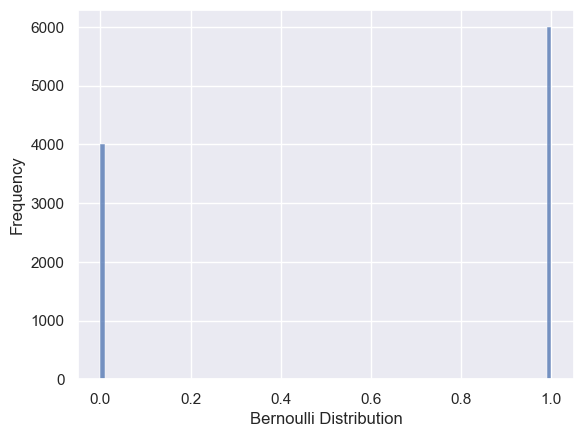

In [10]:
data_bern = bernoulli.rvs(size=10000, p=0.6)
ax = sns.histplot(data_bern,
                  bins=100,
                  kde=False, # kde=False is for histplot, not distplot in newer seaborn versions
                 )
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

## Binomial Distribution

[ 6  1  5  6  7  5  3  5  7  5  5  3  5  3  6  4 10  6  8  6  6  6  6  5
  4  6  3  6  6  4  5  7  6  5  7  7 10  5  5  3  5  5  3  5  2  7  7  5
  7  3  7  5  6  4  3  3  7  1  6  5  7  6  5  6  5  4  4  5  5  8  5  5
  4  7  3  7  6  7  5  4  4  5  6  4  5  4  6  4  2  7  5  6  5  5  4  4
  3  6  5  5  5  1  4  2  5  5  3  8  6  7  6  6  6  5  6  4  7  6  5  6
  6  5  6  1  6  3  5  6  7  2  5  7  5  5  5  2  4  2  1  9  9  4  3  4
  4  6  5  1  3  8  5  6  5  5  4  5  3  7  5  3  6  8  5  4  5  5  3  7
  2  7  3  6  5  5  3  6  2  6  8  5  6  4  4  7  5  4  3  3  2  5  4  2
  7  6  8  5  5  4  9  3  8  5  4  4  8  6  7  6  6  5  3  3  3  3  4  7
  5  2  3  6  5  3  7  6  7  2  0  3  5  7  3  7  7  6  3  5  4  2  6  4
  5  4  4  4  4  4  6  8  3  6  5  1  4  5  6  4  5  6  6  2  4  4  5  6
  6  3  5  5  6  3  1  6  8  6  4  5  6  3  0  4  6  5  4  2  7  3  4  6
  5  6  6  8  7  5  7  6  4  8  6  4  4  5  7  4  7  4  5  5  5  3  7  3
  2  6  4  7  5  7  5  4  6  4  7  5  4  8  4  4  7

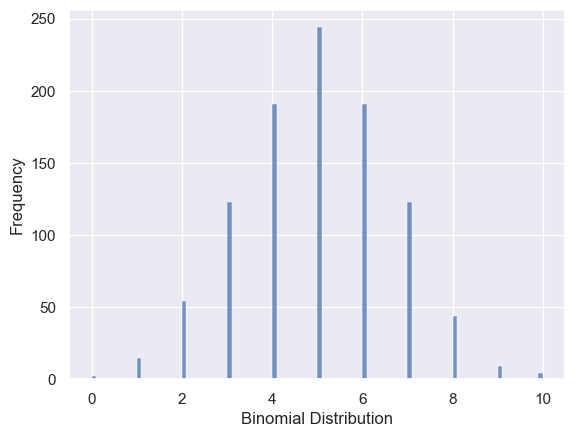

In [12]:
from scipy.stats import binom

data_binom = binom.rvs(n=10, p=0.5, size=1000)
ax = sns.histplot(data_binom, # distplot is deprecated for just histogram. histplot is preferred.
                  bins=100,
                  kde=False,
                 )
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')
print(data_binom)

##  Poisson Distribution

In [13]:
from scipy.stats import poisson

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

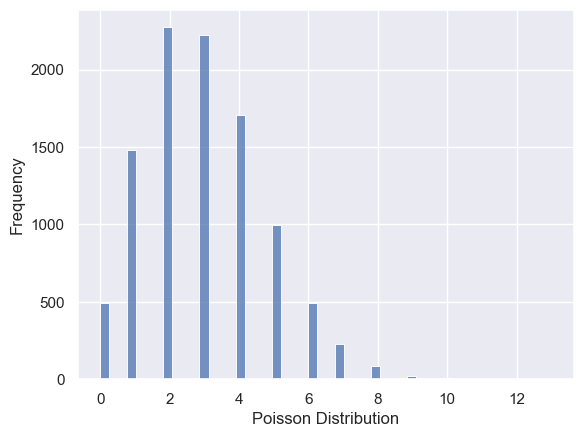

In [14]:
data_poisson = poisson.rvs(mu=3, size=10000)
ax = sns.histplot(data_poisson,  # Using histplot as distplot is deprecated for just histograms
                  bins=50,
                  kde=False,
                 )
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')